In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import numpy as np
import keras
from keras import layers
from tensorflow import data as tf_data
import matplotlib.pyplot as plt

C:\Users\sarah\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# Filtering out bad images

num_skipped = 0
for folder_name in ("Angelina Jolie", "Brad Pitt", "Denzel Washington",
                   "Hugh Jackman", "Jennifer Lawrence", "Johnny Depp",
                   "Kate Winslet", "Leonardo DiCaprio", "Megan Fox",
                   "Natalie Portman", "Nicole Kidman", "Robert Downey Jr.",
                   "Sandra Bullock", "Scarlett Johansson", "Tom Cruise", 
                   "Tom Hanks", "Will Smith"):
    max_images = 100
    folder_path = os.path.join("Celebrity Faces Dataset", folder_name)
    for image_i,fname in enumerate(os.listdir(folder_path)):
        fpath = os.path.join(folder_path, fname)
        try:
            fobj = open(fpath, "rb")
            is_jfif = b"JFIF" in fobj.peek(10)
        finally:
            fobj.close()
            
        if image_i > max_images or not is_jfif:
             num_skipped += 1
             # Delete corrupted image
             os.remove(fpath)

print(f"Deleted {num_skipped} images.")

Deleted 99 images.


In [4]:
import shutil
import random

# Select classes and discard extra classes
classes = ["Angelina Jolie", "Brad Pitt", "Denzel Washington",
            "Hugh Jackman", "Jennifer Lawrence"]

# Create directories for train and test data
train_dir = "train_data"
test_dir = "test_data"
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Copy a subset of images for each class to train and test directories
for class_name in classes:
    class_dir = os.path.join("Celebrity Faces Dataset", class_name)
    all_images = os.listdir(class_dir)
    selected_images = np.random.choice(all_images, size=min(100, len(all_images)), replace=False)
    train_images, test_images = train_test_split(selected_images, test_size=0.2, random_state=42)
    
    for image in train_images:
        src = os.path.join(class_dir, image)
        dst = os.path.join(train_dir, class_name, image)
        os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
        shutil.copy(src, dst)
    
    for image in test_images:
        src = os.path.join(class_dir, image)
        dst = os.path.join(test_dir, class_name, image)
        os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)
        shutil.copy(src, dst)

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data generators for train and test data
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load training data
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

# Load test data
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

Found 400 images belonging to 5 classes.
Found 100 images belonging to 5 classes.


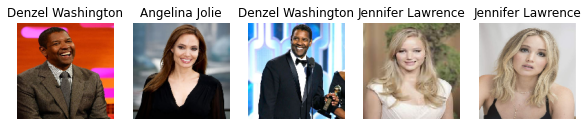

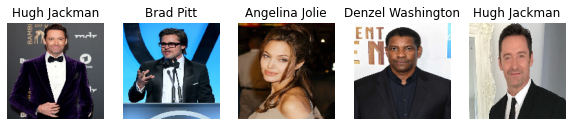

In [8]:
def visualize_images(generator, num_images=5):
    class_labels = {v: k for k, v in generator.class_indices.items()}
    plt.figure(figsize=(10, 5))
    images, labels = next(generator)  # Get a batch of images and labels
    for i in range(num_images):
        plt.subplot(2, num_images, i + 1)
        image = images[i]
        label = class_labels[np.argmax(labels[i])]  # Use np.argmax to get the label index
        plt.imshow(image)
        plt.title(label)
        plt.axis('off')
    plt.show()

# Visualize sample images from the training and test data
visualize_images(train_generator)
visualize_images(test_generator)

In [9]:
# created a dataloader.py file